<a href="https://colab.research.google.com/github/statistics-jun/2022-1-ESAA/blob/main/%EB%B0%9C%ED%91%9C_%EC%9E%90%EB%A3%8C_0627_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **캐글 필사 - Flower Recognition CNN Keras**

데이터 구성 확인

* `os` 모듈 : 운영체제(Operating System)에서 제공되는 여러 기능을 파이썬에서 수행
  - `os.listdir` : 주어진 경로에 존재하는 디렉토리 및 파일 목록 리스트 반환

In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/ESAA/2022-1/월요일 스터디 세션/220627/flowers'))

['sunflower', 'tulip', 'daisy', 'rose', 'dandelion']


## **1) Importing Various Modules**
: 다양한 모듈 불러오기

In [ ]:
# 경고 무시
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# 데이터 시각화 및 조작
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
# 그래프 구성
# matplotlib을 인라인으로 설정하고 각 셀 아래에 그래프 표시
%matplotlib inline  
style.use('fivethirtyeight') # stylesheet 설정
sns.set(style='whitegrid',color_codes=True) # seaborn theme 설정

# 모델 선택
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# 전처리
from keras.preprocessing.image import ImageDataGenerator

# 딥러닝(DL) 라이브러리
from keras import backend as K # TensorFlow Backend 사용
from keras.models import Sequential
from keras.layers import Dense
'''아래 두 줄의 코드는 keras 앞에 tensorflow를 추가하여 모듈 임포트 오류 해결'''
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical

# CNN 모델 생성에 필요한 모듈
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# 압축된 이미지 조작과 이미지 픽셀 값의 numpy array를 가져오기 위한 모듈
import cv2 # 실시간 이미지 프로세싱                
import numpy as np  
from tqdm import tqdm # 작업 진행률 프로세스 바 표시
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image # 이미지 분석 및 처리 (Python Imaging Library)

## **2) Preparing the Data**
: 데이터 준비

### **2.1) Making the functions to get the training and validation set from the Images**
: 이미지로부터 훈련 및 검증 세트를 생성할 수 있도록 데이터를 가공하는 함수 정의

In [ ]:
X = [] # 이미지 numpy 배열 리스트
Z = [] # 레이블 리스트
IMG_SIZE = 150

# 꽃 종류별 이미지 폴더 경로 변수 생성
FLOWER_DAISY_DIR = '/content/drive/MyDrive/ESAA/2022-1/월요일 스터디 세션/220627/flowers/daisy'
FLOWER_SUNFLOWER_DIR = '/content/drive/MyDrive/ESAA/2022-1/월요일 스터디 세션/220627/flowers/sunflower'
FLOWER_TULIP_DIR = '/content/drive/MyDrive/ESAA/2022-1/월요일 스터디 세션/220627/flowers/tulip'
FLOWER_DANDI_DIR = '/content/drive/MyDrive/ESAA/2022-1/월요일 스터디 세션/220627/flowers/dandelion'
FLOWER_ROSE_DIR = '/content/drive/MyDrive/ESAA/2022-1/월요일 스터디 세션/220627/flowers/rose'

In [ ]:
# 꽃 종류 레이블을 부여하는 함수
'''
[입력 변수]
img : 꽃 이미지 파일
flower_type : 꽃 종류
'''
def assign_label(img, flower_type):
    return flower_type

* `os.path.join` : 인수로 전달된 2개의 문자열을 결합하여 1개의 경로 생성
* `cv2` 모듈 : 실시간 이미지 프로세싱   
  - `cv2.imread(path, flag)` : 주어진 경로에 있는 이미지 파일을 flag 옵션대로 읽음
    - flag 종류
      - `cv2.IMREAD_COLOR` : 이미지 파일을 Color로 읽기, 투명한 부분은 무시(default)
      - `cv2.IMREAD_GRAYSCALE` : 이미지 파일을 Grayscale로 읽기
      - `cv2.IMREAD_UNCHANGED` : alpha channel까지 포함하여 이미지 파일 읽기
* `tqdm` 모듈 : 작업 진행률 프로세스 바 표시

In [ ]:
# 훈련 데이터 가공 함수
'''
[입력 변수]
flower_type : 꽃 종류
DIR : 꽃 종류별 이미지 폴더 경로
'''
def make_train_data(flower_type, DIR):
    # DIR에 있는 모든 이미지 파일에 대하여 for문 수행하며 작업 진행률 표시
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type) # 꽃 종류 레이블
        path = os.path.join(DIR, img) # 각 이미지의 경로
        img = cv2.imread(path, cv2.IMREAD_COLOR) # 이미지 파일 컬러로 읽기
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # 이미지 사이즈를 (150, 150)으로 변환
        
        X.append(np.array(img)) # 리스트 X에 이미지 numpy 배열 추가
        Z.append(str(label)) # 리스트 Z에 레이블을 문자열 형태로 추가

In [ ]:
# 데이지
make_train_data('Daisy', FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:12<00:00, 61.74it/s] 

764


In [ ]:
# 해바라기
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:13<00:00, 55.33it/s] 

1497


In [ ]:
# 튤립
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:16<00:00, 58.50it/s] 

2481


In [ ]:
# 민들레
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:23<00:00, 43.99it/s] 

3533


In [ ]:
# 장미
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:12<00:00, 62.45it/s] 

4317


### **2.2) Visualizing some Random Images**
: 랜덤 이미지 시각화

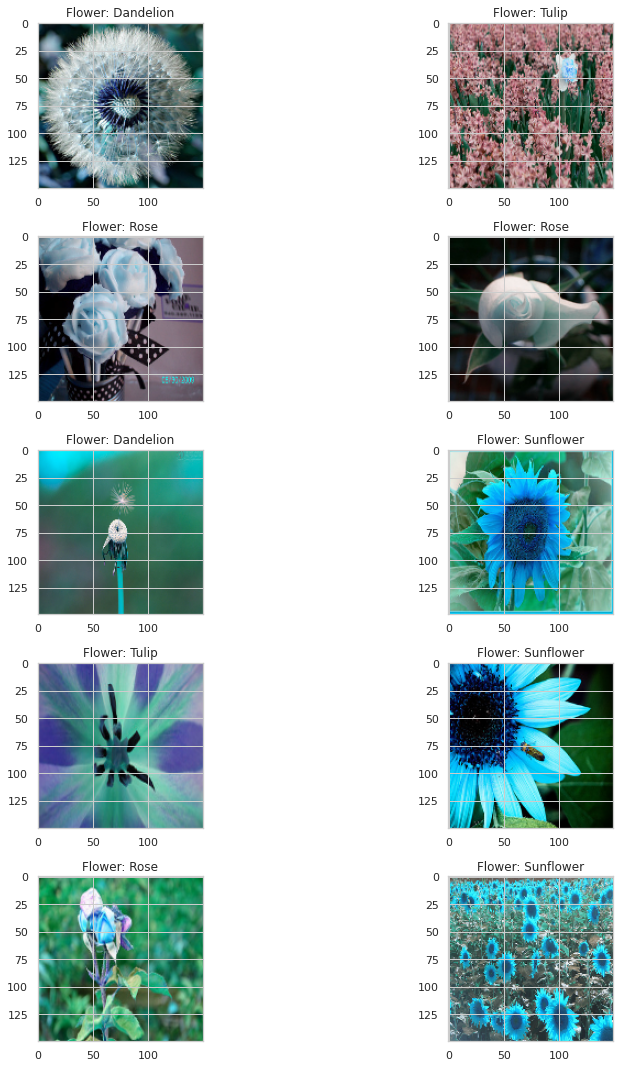

In [ ]:
fig, ax = plt.subplots(5, 2) # 가로 5 * 세로 2 = 10개의 이미지를 갖는 figure 생성
fig.set_size_inches(15, 15)

for i in range(5):
    for j in range (2):
        l = rn.randint(0, len(Z)) # 랜덤한 숫자 선택
        ax[i,j].imshow(X[l]) # 이미지 출력
        ax[i,j].set_title('Flower: '+Z[l]) # 꽃 종류 레이블을 제목으로 설정
        
plt.tight_layout() # subplot들이 겹치지 않도록 자동으로 여백 생성

### **2.3) Label Encoding the Y array & One Hot Encoding**
: 레이블 리스트 Z를 Label Encoding하여 Y 배열 생성 후 One Hot Encoding

* Label Encoding : n개의 범주를 갖는 문자열 데이터를 알파벳 순서대로 0부터 n-1까지의 정수 값으로 변환
* One Hot Encoding : 범주의 개수만큼 피처 칼럼을 추가하여 고유 값에 해당하는 칼럼에만 1을 할당하고 나머지 칼럼에는 0을 할당하는 방식으로 변환

* `to_categorical(y, num_classes)` : 입력받은 1차원 정수 배열 y를 (len(y), num_classes) 크기의 2차원 행렬로 원 핫 인코딩

In [ ]:
# Label Encoding
le = LabelEncoder()
Y = le.fit_transform(Z)

# One Hot Encoding
Y = to_categorical(Y, 5) # Y를 5개의 클래스를 갖는 2차원 이진 행렬로 변환

X = np.array(X) # X를 numpy array로 변환
X = X/255 # 정규화

### **2.4) Splitting into Training and Validation Sets**
: 훈련 및 검증 세트로 분할

In [ ]:
# 훈련 세트 : 검증 세트 = 75 : 25
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### **2.5) Setting the Random Seeds**
: 랜덤 시드 설정

In [ ]:
np.random.seed(42)
rn.seed(42)
''' set_random_seed 대신 random.set_seed를 사용하여 텐서플로 버전별 명령어 차이로 인한 오류 해결'''
tf.random.set_seed(42)

## **3) Modelling**
: 모델링

### **3.1) Building the ConvNet Model**
: ConvNet(CNN, 합성곱 신경망) 모델 생성

In [ ]:
# CNN을 사용하여 모델링

model = Sequential()

# Convolution 층 
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Classifier 출력층
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax")) # 5개의 클래스에 대한 다중 분류

### **3.2) Using a LR Annealer**
: LR Annealer 사용

* **Learning Rate Annealing** : 초기 learning rate를 상대적으로 크게 설정하여 local minimum에 보다 더 빠르게 다가갈 수 있게 만들고, 이후 learning rate를 줄여 local minimum에 보다 더 정확하게 수렴할 수 있게 만드는 기법

  -> 경사하강법에 의한 학습 시 local minimum에 빠져 모델이 정체되거나 심하게 튀는 문제 해결

* `ReduceLROnPlateau(monitor, patience, verbose, factor)` : 모델의 개선이 없을 경우 learning rate를 조절해 모델의 개선을 유도하는 콜백함수
  - `monitor` : 모니터링 기준 값
  - `patience` : 모니터링 기준 값이 patience에서 지정한 횟수의 epoch를 진행했는데도 개선되지 않으면 learning rate 조정
  - `verbose` : 화면 메시지 표시 여부 결정 (0:표시 X / 1:표시 O)
  - `factor` : learning rate를 감소시키는 비율
    - 새로운 learning rate = 기존 learning rate * factor

In [ ]:
batch_size=128
epochs=50

# Learning Rate Annealing
from keras.callbacks import ReduceLROnPlateau
# 3 epoch 동안 val_acc의 개선이 없으면 새로운 learning rate를 기존 learning rate의 0.1배로 지정
red_lr= ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.1)